<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignment 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [47]:
##### Your Code Here #####
import pandas as pd
# import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.losses import mean_squared_error, categorical_crossentropy
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
import os, datetime

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

In [48]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [57]:
opt = Adam()
model = Sequential()
stop = EarlyStopping(monitor='val_mse', min_delta=1, patience=10)

model.add(Dense(13, input_shape=[X_train.shape[1]]))
model.add(Activation('relu'))
model.add(Dropout(.2))
model.add(Dense(7))
model.add(Activation('relu'))
model.add(Dense(4))
model.add(Activation('relu'))
model.add(Dense(2))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('linear'))

model.compile(optimizer=opt, loss=mean_squared_error, metrics=['mse'])

model.fit(X_train, y_train, epochs=999, validation_split=.2, callbacks=[stop])

Train on 323 samples, validate on 81 samples
Epoch 1/999
323/323 [==============================] - 0s 1ms/sample - loss: 562.9315 - mse: 562.9315 - val_loss: 628.3121 - val_mse: 628.3121
Epoch 2/999
323/323 [==============================] - 0s 82us/sample - loss: 557.4299 - mse: 557.4299 - val_loss: 621.4601 - val_mse: 621.4601
Epoch 3/999
323/323 [==============================] - 0s 78us/sample - loss: 551.3923 - mse: 551.3924 - val_loss: 613.4703 - val_mse: 613.4703
Epoch 4/999
323/323 [==============================] - 0s 71us/sample - loss: 543.4337 - mse: 543.4337 - val_loss: 603.6888 - val_mse: 603.6888
Epoch 5/999
323/323 [==============================] - 0s 71us/sample - loss: 533.8894 - mse: 533.8893 - val_loss: 592.2891 - val_mse: 592.2891
Epoch 6/999
323/323 [==============================] - 0s 68us/sample - loss: 523.7153 - mse: 523.7153 - val_loss: 579.1562 - val_mse: 579.1561
Epoch 7/999
323/323 [==============================] - 0s 77us/sample - loss: 509.8452 - mse

In [58]:
model.evaluate(X_test, y_test)

102/102 [==============================] - 0s 47us/sample - loss: 27.7277 - mse: 27.7277


[27.72769613826976, 27.727697]

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- The number of nodes in your output layer should equal the number of classes you want to predict for Fashion-MNIST.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [31]:
##### Your Code Here #####
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [32]:
num_classes = 10

X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') /255.

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [80]:
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = TensorBoard(logdir, histogram_freq=1)

stop = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=3)

model = Sequential()
opt = Adam()

model.add(Flatten())

model.add(Dropout(.2))
model.add(Dense(728, input_dim=728))
model.add(Activation('relu'))

# model.add(Dropout(.2))
model.add(Dense(369))
model.add(Activation('relu'))

# model.add(Dropout(.2))
model.add(Dense(190)),
model.add(Activation('relu'))

# model.add(Dropout(.2))
model.add(Dense(100))
model.add(Activation('relu'))

# model.add(Dropout(.2))
model.add(Dense(55))
model.add(Activation('relu'))

# model.add(Dropout(.2))
model.add(Dense(32))
model.add(Activation('relu'))

# model.add(Dropout(.2))
model.add(Dense(21))
model.add(Activation('relu'))

# model.add(Dropout(.2))
model.add(Dense(15))
model.add(Activation('relu'))

# model.add(Dropout(.2))
model.add(Dense(12))
model.add(Activation('relu'))

# model.add(Dropout(.2))
model.add(Dense(11))
model.add(Activation('relu'))

model.add(Dropout(.2))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss=categorical_crossentropy, optimizer=opt, metrics=['accuracy'])

model.fit(X_train, y_train, epochs=999, validation_split=.2, verbose=1,
          callbacks=[tensorboard_callback, stop])

Train on 48000 samples, validate on 12000 samples
Epoch 1/999
48000/48000 [==============================] - 9s 180us/sample - loss: 0.8324 - accuracy: 0.7264 - val_loss: 0.3009 - val_accuracy: 0.9317
Epoch 2/999
48000/48000 [==============================] - 8s 170us/sample - loss: 0.3901 - accuracy: 0.8882 - val_loss: 0.1660 - val_accuracy: 0.9642
Epoch 3/999
48000/48000 [==============================] - 8s 169us/sample - loss: 0.3147 - accuracy: 0.9106 - val_loss: 0.1469 - val_accuracy: 0.9684
Epoch 4/999
48000/48000 [==============================] - 8s 168us/sample - loss: 0.2807 - accuracy: 0.9200 - val_loss: 0.1582 - val_accuracy: 0.9700
Epoch 5/999
48000/48000 [==============================] - 8s 169us/sample - loss: 0.2581 - accuracy: 0.9247 - val_loss: 0.1489 - val_accuracy: 0.9696


In [81]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 55us/sample - loss: 0.1468 - accuracy: 0.9685


[0.1467601068132557, 0.9685]

Train on 48000 samples, validate on 12000 samples
Epoch 1/999
48000/48000 [==============================] - 8s 167us/sample - loss: 0.2384 - accuracy: 0.9308 - val_loss: 0.1324 - val_accuracy: 0.9738
Epoch 2/999
48000/48000 [==============================] - 8s 169us/sample - loss: 0.2179 - accuracy: 0.9371 - val_loss: 0.1377 - val_accuracy: 0.9703
Epoch 3/999
48000/48000 [==============================] - 8s 169us/sample - loss: 0.1992 - accuracy: 0.9406 - val_loss: 0.1498 - val_accuracy: 0.9699
Epoch 4/999
48000/48000 [==============================] - 8s 169us/sample - loss: 0.1947 - accuracy: 0.9428 - val_loss: 0.1179 - val_accuracy: 0.9768


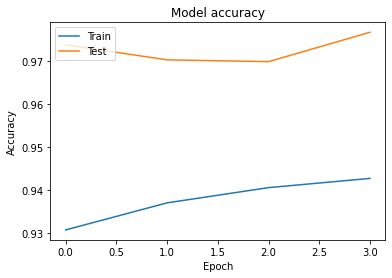

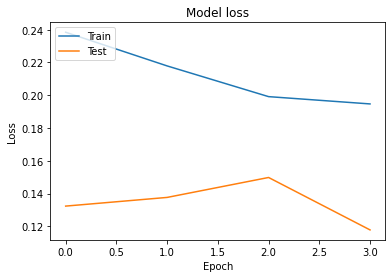

In [82]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train, epochs=999, validation_split=.2, verbose=1,
          callbacks=[tensorboard_callback, stop])

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.